## K-Means Clustering

In [1]:
# Import Libraries
get_ipython().magic('matplotlib inline')
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
from random import sample #Used for random initialization
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
from scipy import linalg #Used for the "SVD" function

In [3]:
# Load Data
mat = scipy.io.loadmat('/Users/wiseer85/Documents/Data Science/ML Exercises/data/ex7data2.mat')
X = mat['X']

In [4]:
# Choose the number of centroids
K = 3

# Choose the initial centroids 
initial_centroids = np.array([[3,3],[6,2],[8,5]])

In [17]:
# Visualizing the data
def plotData(myX,mycentroids,myidxs = None):
    colors = ['b','g','gold','darkorange','salmon','olivedrab']
    assert myX[0].shape == mycentroids[0][0].shape
    assert mycentroids[-1].shape[0] <= len(colors)

    # If idxs is supplied, divide up X into colors
    if myidxs is not None:
        assert myidxs.shape[0] == myX.shape[0]
        subX = []
        for x in range(mycentroids[0].shape[0]):
            subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i] == x]))
    else:
        subX = [myX]
        
    fig = plt.figure(figsize=(7,5))
    for x in range(len(subX)):
        newX = subX[x]
        plt.plot(newX[:,0],newX[:,1],'o',color=colors[x],
                 alpha=0.75, label='Data Points: Cluster %d'%x)
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.title('Plot of X Points',fontsize=16)
    plt.grid(True)

    # Draw a history of centroid movement
    tempx, tempy = [], []
    for mycentroid in mycentroids:
        tempx.append(mycentroid[:,0])
        tempy.append(mycentroid[:,1])
    
    for x in range(len(tempx[0])):
        plt.plot(tempx, tempy, 'rx--', markersize=8)

    leg = plt.legend(loc=4, framealpha=0.5)

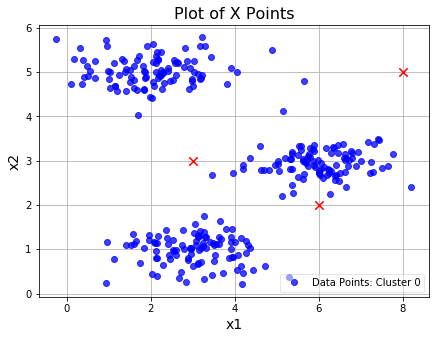

In [18]:
plotData(X,[initial_centroids])

In [19]:
# Define Functions
def distSquared(point1, point2):
    assert point1.shape == point2.shape
    return np.sum(np.square(point2-point1))

def findClosestCentroids(myX, mycentroids):
    idxs = np.zeros((myX.shape[0],1))
    
    # Loop through each data point in X
    for x in range(idxs.shape[0]):
        mypoint = myX[x]
        # Compare this point to each centroid,
        # Keep track of shortest distance and index of shortest distance
        mindist, idx = 9999999, 0
        for i in range(mycentroids.shape[0]):
            mycentroid = mycentroids[i]
            distsquared = distSquared(mycentroid,mypoint)
            if distsquared < mindist:
                mindist = distsquared
                idx = i
        # With the best index found, modify the result idx vector
        idxs[x] = idx
        
    return idxs

In [20]:
idxs = findClosestCentroids(X,initial_centroids)
print(idxs[:3].flatten())

[0. 2. 1.]


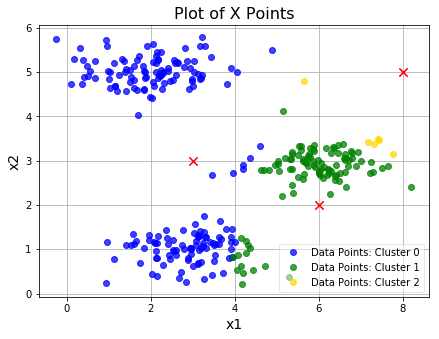

In [21]:
plotData(X,[initial_centroids],idxs)

In [22]:
# Computing centroid means
def computeCentroids(myX, myidxs):
    subX = []
    for x in range(len(np.unique(myidxs))):
        subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i] == x]))
    return np.array([np.mean(thisX,axis=0) for thisX in subX])

In [23]:
# Define k-means function
def runKMeans(myX, initial_centroids, K, n_iter):
    centroid_history = []
    current_centroids = initial_centroids
    for myiter in range(n_iter):
        centroid_history.append(current_centroids)
        idxs = findClosestCentroids(myX,current_centroids)
        current_centroids = computeCentroids(myX,idxs)
        
    return idxs, centroid_history

In [24]:
# Fit the model
idxs, centroid_history = runKMeans(X,initial_centroids,K=3,n_iter=10)

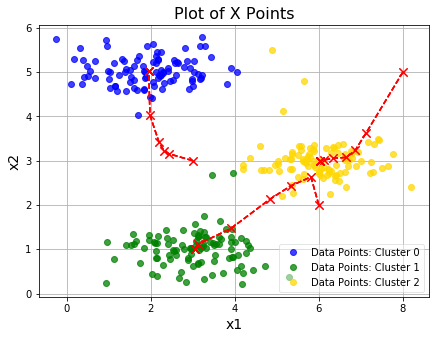

In [25]:
plotData(X,centroid_history,idxs)

In [26]:
# Random initialization
def chooseKRandomCentroids(myX, K):
    rand_indices = sample(range(0,myX.shape[0]),K)
    return np.array([myX[i] for i in rand_indices]) 

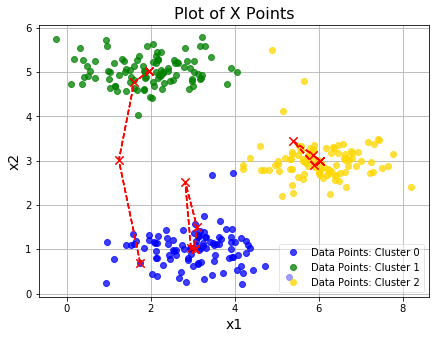

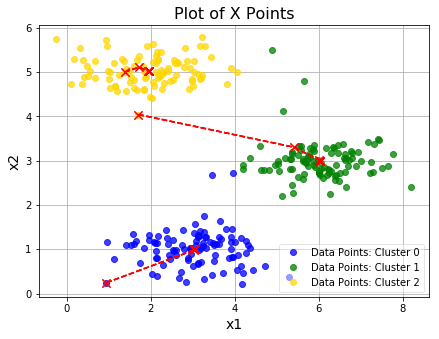

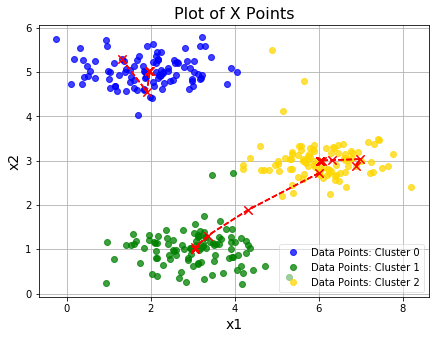

In [27]:
# Centroid progression plot with random initial centroids
for x in range(3):
    idxs, centroid_history = runKMeans(X,chooseKRandomCentroids(X,K=3),
                                       K=3,n_iter=10)
    plotData(X,centroid_history,idxs)